#### Exercise 1
Create a variable phrase containing a list of words. Review the operations described in the previous chapter, including addition, multiplication, indexing, slicing, and sorting.

In [1]:
phrase=['so','no','one','told','you','life','was','gonna','be','this','way']
phrase

['so', 'no', 'one', 'told', 'you', 'life', 'was', 'gonna', 'be', 'this', 'way']

In [2]:
#addition
print(phrase+['your','job\'s','a','joke',',','you\'re','broke'])
#Multiplication
print(phrase*2)
#Indexing
print(phrase[1])
#Slicing
print(phrase[:4])
#Sorting
print(sorted(phrase))

['so', 'no', 'one', 'told', 'you', 'life', 'was', 'gonna', 'be', 'this', 'way', 'your', "job's", 'a', 'joke', ',', "you're", 'broke']
['so', 'no', 'one', 'told', 'you', 'life', 'was', 'gonna', 'be', 'this', 'way', 'so', 'no', 'one', 'told', 'you', 'life', 'was', 'gonna', 'be', 'this', 'way']
no
['so', 'no', 'one', 'told']
['be', 'gonna', 'life', 'no', 'one', 'so', 'this', 'told', 'was', 'way', 'you']


#### Exercise 2
Use the corpus module to explore austen-persuasion.txt. How many word tokens does this book have? How many word types?

In [3]:
import nltk
from nltk.corpus import gutenberg

In [4]:
austen=gutenberg.words('austen-persuasion.txt')
austen

['[', 'Persuasion', 'by', 'Jane', 'Austen', '1818', ...]

In [5]:
print('No.of tokens: {}'.format(len([w for w in austen])))
print('No.of word types: {}'.format(len(set([w for w in austen if len(w)>=2 and w.isalpha()]))))

No.of tokens: 98171
No.of word types: 6022


#### Exercise 3
Use the Brown corpus reader nltk.corpus.brown.words() or the Web text corpus reader nltk.corpus.webtext.words() to access some sample text in two different genres.

In [6]:
from nltk.corpus import brown
brownWords=brown.words(categories=['hobbies','humor'])
print(brownWords[:10])

['Too', 'often', 'a', 'beginning', 'bodybuilder', 'has', 'to', 'do', 'his', 'training']


#### Exercise 4
Read in the texts of the State of the Union addresses, using the state_union corpus reader. Count occurrences of men, women, and people in each document. What has happened to the usage of these words over time?

In [7]:
from nltk.corpus import state_union
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
cfd=nltk.ConditionalFreqDist((target,fileid[:4]) 
        for target in ['men','women','people'] for fileid in state_union.fileids() 
        for w in [w.lower() for w in state_union.words(fileid)] if w==target)
df=pd.DataFrame(cfd,columns=cfd.conditions())
df.fillna(0,inplace=True)
df=df.astype(int)
df.head()

,men,women,people
1945,2,2,10
1946,12,7,49
1947,7,2,12
1948,5,1,22
1949,2,1,15


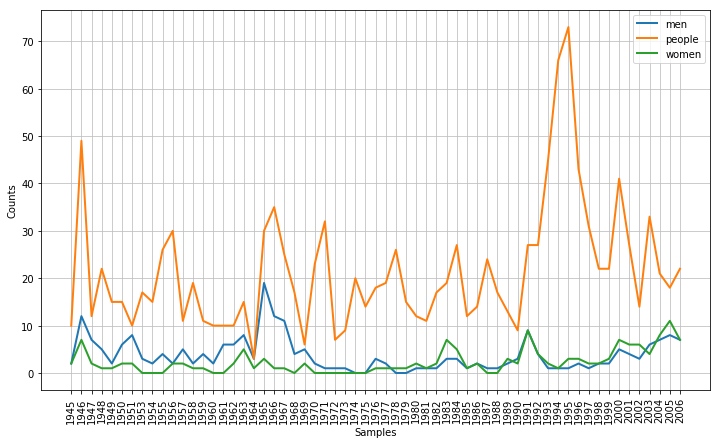

In [8]:
plt.figure(figsize=(12,7))
cfd.plot()

There is a lot of variability in the usage of 'people' over time. Although the usage of 'women' is only slightly above the usage of 'men' over the past 10 years, the use of 'women' has increased (crossed the usage of 'men') gradually over time 

#### Exercise 5
Investigate the holonym-meronym relations for some nouns. Remember that there are three kinds of holonym-meronym relation, so you need to use: member_meronyms(), part_meronyms(),  substance_meronyms(), member_holonyms(), part_holonyms(), and substance_holonyms().

In [9]:
from nltk.corpus import wordnet as wn
print(wn.synset('house.n.01').part_meronyms())
print(wn.synset('wood.n.01').substance_meronyms())
print(wn.synset('forest.n.01').member_meronyms())
print(wn.synset('earth.n.01').part_meronyms())
print(wn.synset('water.n.01').substance_meronyms())
print(wn.synset('people.n.01').member_meronyms())

[Synset('library.n.01'), Synset('loft.n.02'), Synset('porch.n.01'), Synset('study.n.05')]
[Synset('lignin.n.01')]
[Synset('tree.n.01'), Synset('underbrush.n.01')]
[Synset('atmosphere.n.03'), Synset('hemisphere.n.01'), Synset('hydrosphere.n.01'), Synset('land.n.04'), Synset('lithosphere.n.01'), Synset('sky.n.01'), Synset('van_allen_belt.n.01')]
[Synset('hydrogen.n.01'), Synset('oxygen.n.01')]
[Synset('person.n.01')]


In [10]:
print(wn.synset('library.n.01').part_holonyms())
print(wn.synset('lignin.n.01').substance_holonyms())
print(wn.synset('tree.n.01').member_holonyms())
print(wn.synset('atmosphere.n.03').part_holonyms())
print(wn.synset('hydrogen.n.01').substance_holonyms())
print(wn.synset('earth.n.01').member_holonyms())

[Synset('house.n.01')]
[Synset('wood.n.01')]
[Synset('forest.n.01')]
[Synset('earth.n.01')]
[Synset('water.n.01')]
[Synset('solar_system.n.01')]


#### Exercise 6
In the discussion of comparative wordlists, we created an object called translate which you could look up using words in both German and Spanish in order to get corresponding words in English. What problem might arise with this approach? Can you suggest a way to avoid this problem?

In [11]:
from nltk.corpus import swadesh
fr2en=swadesh.entries(['fr','en'])
de2en=swadesh.entries(['de','en'])
es2en=swadesh.entries(['es','en'])
translate=dict(fr2en)
translate.update(de2en)
translate.update(es2en)

In [12]:
len(translate)

612

In [13]:
dict1=dict(fr2en)
dict2=dict(de2en)
dict3=dict(es2en)

In [14]:
len([k1 for k1 in list(dict1.keys()) for k2 in list(dict2.keys())if k1==k2])

0

In [15]:
len([k1 for k1 in list(dict1.keys()) for k2 in list(dict3.keys())if k1==k2])

6

In [16]:
[k1 for k1 in list(dict1.keys()) for k2 in list(dict3.keys())if k1==k2]

['animal', 'ver', 'dos', 'dormir', 'venir', 'si']

In [17]:
len([k1 for k1 in list(dict2.keys()) for k2 in list(dict3.keys())if k1==k2])

0

dict1.update(dict2) adds the key,value in dict2 to dict1 if the key is not in dict1 else updates it. The problem with this approach is that the words with same spelling in german and spanish but different english translation may get updated with the same translation. To avoid this, tag each key with its language ID.

In [18]:
fr2en=[(k+'-fr',v) for (k,v) in fr2en]
de2en=[(k+'-de',v) for (k,v) in de2en]
es2en=[(k+'-es',v) for (k,v) in es2en]
translate=dict(fr2en)
translate.update(de2en)
translate.update(es2en)

In [19]:
len(translate)

618

There are 6 common words between french and spanish

#### Exercise 7
According to Strunk and White's Elements of Style, the word however, used at the start of a sentence, means "in whatever way" or "to whatever extent", and not "nevertheless". They give this example of correct usage: However you advise him, he will probably do as he thinks best. (http://www.bartleby.com/141/strunk3.html) Use the concordance tool to study actual usage of this word in the various texts we have been considering. See also the LanguageLog posting "Fossilized prejudices about 'however'" at http://itre.cis.upenn.edu/~myl/languagelog/archives/001913.html

In [20]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [21]:
text1.concordance('however',lines=5)

Displaying 5 of 95 matches:
gledy - piggledy whale statements , however authentic , in these extracts , for
lave ? Tell me that . Well , then , however the old sea - captains may order me
ea - captains may order me about -- however they may thump and punch me about ,
 needs be the sign of " The Trap ." However , I picked myself up and hearing a 
 the conclusion that such an idea , however wild , might not be altogether unwa


In [22]:
text2.concordance('however',lines=5)

Displaying 5 of 155 matches:
hters . He meant not to be unkind , however , and , as a mark of his affection 
e condition of visitors . As such , however , they were treated by her with qui
le ." His wife hesitated a little , however , in giving her consent to this pla
urned Mrs . John Dashwood . " But , however , ONE thing must be considered . Wh
 can ever afford to live in . But , however , so it is . Your father thought on


In [23]:
text4.concordance('however',lines=5)

Displaying 5 of 54 matches:
 this extensive country . Relying , however , on the purity of their intentions
t become me here to speak . I may , however , be pardoned for not suppressing t
 accord in all questions touching , however remotely , the liberty , prosperity
its overthrow . These occurrences , however , have been far less frequent in ou
s and promises made in the former . However much the world may have improved in


In [24]:
text7.concordance('however',lines=5)

Displaying 5 of 35 matches:
s , such as telephones or watches . However , none of the big three weeklies re
ther intellectual-property rights . However , five other countries -- China , T
to be sold *-50 in the U.S. *T*-1 . However , after two meetings with the Sovie
clining . The purchasing managers , however , also said that orders turned up i
 of worries about potential abuse , however , he says 0 the state will begin *-


In [25]:
text9.concordance('however',lines=5)

Displaying 5 of 27 matches:
m within this almost saintly oval , however , his face projected suddenly broad
ttle man with the black beard was , however , still contracted with something l
rd . By the sheer rush of routine , however , the motion would have been put an
retary said -- " We are wandering , however , from the point . The only questio
 wax lady in evening dress . Snow , however , began to thicken and fall fast ; 


#### Exercise 8
Define a conditional frequency distribution over the Names corpus that allows you to see which initial letters are more frequent for males vs. females (cf. 4.4)

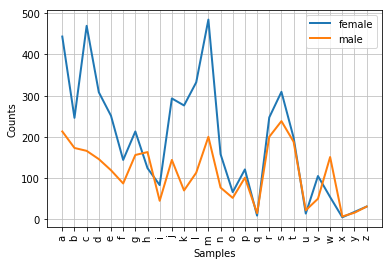

In [26]:
from nltk.corpus import names
cfdNames=nltk.ConditionalFreqDist((target,name[0]) for target 
        in ['male','female'] for name in [name.lower() for name in names.words(target+'.txt')])
cfdNames.plot()

In [27]:
len(names.words('female.txt'))

5001

In [28]:
len(names.words('male.txt'))

2943

In [29]:
# Normalize the frequencies with corpus length
df=pd.DataFrame(cfdNames,columns=cfdNames.conditions())
df.female=df.female/len(names.words('female.txt'))
df.male=df.male/len(names.words('male.txt'))
df.head()

,male,female
a,0.072375,0.088582
b,0.058784,0.049190
c,0.056405,0.093781
d,0.049609,0.061588
e,0.040435,0.050190


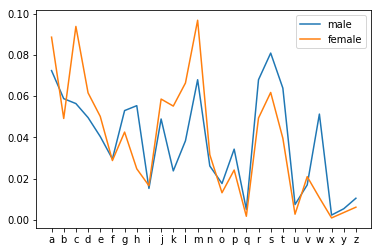

In [30]:
plt.plot(df)
plt.legend(df.columns)

g,h,s and w seem more frequent for males compared to females

#### Exercise 9
Pick a pair of texts and study the differences between them, in terms of vocabulary, vocabulary richness, genre, etc. Can you find pairs of words which have quite different meanings across the two texts, such as monstrous in Moby Dick and in Sense and Sensibility?

In [31]:
text3

<Text: The Book of Genesis>

In [32]:
text4

<Text: Inaugural Address Corpus>

In [33]:
from nltk.corpus import stopwords

In [34]:
# comparing t1 and t2
def corpusMetrics(t1,t2):
    t1=[word.lower() for word in t1 if len(word)>=2 and word.isalpha()]
    t2=[word.lower() for word in t2 if len(word)>=2 and word.isalpha()]
    v1=set(t1); v2=set(t2);
    print('vocabulary:',len(v1),len(v2));
    print('lexical diversity:', round(len(v1)/len(t1),2),round(len(v2)/len(t2),2));
    freq1=FreqDist([w for w in t1 if w not in stopwords.words('english')])
    freq2=FreqDist([w for w in t2 if w not in stopwords.words('english')])
    print(freq1.most_common(10),freq2.most_common(10))

In [35]:
corpusMetrics(text3,text4)

vocabulary: 2603 8959
lexical diversity: 0.07 0.07
[('unto', 598), ('said', 477), ('thou', 284), ('thy', 278), ('shall', 259), ('thee', 257), ('god', 231), ('lord', 207), ('father', 198), ('land', 184)] [('government', 593), ('people', 563), ('us', 455), ('upon', 369), ('must', 346), ('may', 334), ('great', 331), ('states', 329), ('world', 329), ('shall', 314)]


In [36]:
text3.concordance('peace',lines=5)

Displaying 5 of 8 matches:
 And thou shalt go to thy fathers in peace ; thou shalt be buried in a good old
nd the man wondering at her held his peace , to wit whether the LORD had made h
away , and they departed from him in peace . And it came to pass the same day ,
come again to my father ' s house in peace ; then shall the LORD be my G And th
cattle in the fie and Jacob held his peace until they were come . And Hamor the


In [37]:
text4.concordance('peace',lines=5)

Displaying 5 of 252 matches:
 and delight in its effects upon the peace , order , prosperity , and happiness
 love of liberty to independence and peace , to increasing wealth and unexample
or secret enemies of his country ' s peace . This example has been recommended 
inflexible determination to maintain peace and inviolable faith with all nation
es and to all nations , and maintain peace , friendship , and benevolence with 


text4 has more vocabulary than text3. Both texts have more or less the equal lexical diversity. From the most frequent words text3 seems to be related to God and text4 to politics. The contexts of 'peace' in both the texts are not the same. In text3 its related do death and eternity where as in text4 its peace as opposed to war

#### Exercise 10
Read the BBC News article: UK's Vicky Pollards 'left behind' http://news.bbc.co.uk/1/hi/education/6173441.stm. The article gives the following statistic about teen language: "the top 20 words used, including yeah, no, but and like, account for around a third of all words." How many word types account for a third of all word tokens, for a variety of text sources? What do you conclude about this statistic? Read more about this on LanguageLog, at http://itre.cis.upenn.edu/~myl/languagelog/archives/003993.html.

In [38]:
wordsBrown=[w.lower() for w in brown.words() if w.isalpha()]
freqBrown=nltk.FreqDist(wordsBrown)
top20Brown=freqBrown.most_common(20)

In [39]:
sum20Brown=sum(j for i,j in top20Brown)
sum20Brown

314739

In [40]:
print('Top 20 words in brown corpus account for:',round(sum20Brown/len(wordsBrown)*100,2),'%')

Top 20 words in brown corpus account for: 32.06 %


In [41]:
from nltk.corpus import inaugural
wordsInaugural=[w.lower() for w in inaugural.words() if w.isalpha()]
freqInaugural=nltk.FreqDist(wordsInaugural)
top20Inaugural=freqInaugural.most_common(20)
sum20Inaugural=sum(j for i,j in top20Inaugural)
print('Top 20 words in inaugural corpus account for:',round(sum20Inaugural/len(wordsInaugural)*100,2),'%')

Top 20 words in inaugural corpus account for: 37.03 %


In [42]:
condBrown=[(genre,round(sum(j for i,j in nltk.FreqDist([w.lower() for w in brown.words(categories=genre) 
if w.isalpha()]).most_common(20))/len([w.lower() for w in brown.words(categories=genre) 
if w.isalpha()])*100,2)) for genre in brown.categories()]

In [43]:
condBrown

[('adventure', 33.31),
 ('belles_lettres', 33.59),
 ('editorial', 32.1),
 ('fiction', 33.95),
 ('government', 33.96),
 ('hobbies', 31.98),
 ('humor', 32.73),
 ('learned', 34.08),
 ('lore', 32.57),
 ('mystery', 33.32),
 ('news', 31.56),
 ('religion', 33.29),
 ('reviews', 32.05),
 ('romance', 33.89),
 ('science_fiction', 31.52)]

Totally agree with the blog posts. BBC's claim that the top 20 words used by british teenagers account for a third of what they speak is indicative of their vocabulary, is preposterous. As Mark Liberman mentions in his post, it is a common trend in everybody's speech irrespective of age ranges. Also as he rightly mentions, the vocabulary and metrics of a piece of text depends on the way it is preprocessed, its genre and length. 

#### Exercise 11
Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?

In [44]:
words=['certainly','probably']

In [45]:
cfdBrown=nltk.ConditionalFreqDist((genre,word) for word in words for 
        genre in brown.categories() for w in [w.lower() for w in brown.words(categories=genre)] if word==w)
cfdBrown.tabulate(conditions=['news','editorial'])

          certainly  probably 
     news         7        20 
editorial        19        12 


The news section is neutral where as a the editorial section is opinionated. The frequency of the modal verbs certainly and probably are indicative of the definition of these genres

#### Exercise 12
The CMU Pronouncing Dictionary contains multiple pronunciations for certain words. How many distinct words does it contain? What fraction of words in this dictionary have more than one possible pronunciation?

In [46]:
from nltk.corpus import cmudict
cmu=cmudict.entries()
print('distinct words:',len(dict(cmu).keys()))
print('More than one pronunciation:',round((len(cmu)-len(dict(cmu).keys()))/len(cmu),2))

distinct words: 123455
More than one pronunciation: 0.08


#### Exercise 13
What percentage of noun synsets have no hyponyms? You can get all noun synsets using wn.all_synsets('n').

In [47]:
from nltk.corpus import wordnet as wn
total=0;
count=0;
for synset in wn.all_synsets('n'):
    total+=1;
    if synset.hyponyms()==[]:
        count+=1;
print(round(count/total,3)*100)

79.7


#### Exercise 14
Define a function supergloss(s) that takes a synset s as its argument and returns a string consisting of the concatenation of the definition of s, and the definitions of all the hypernyms and hyponyms of s.

In [48]:
def supergloss(s):
    print(s.definition(),'\n');
    definitionshypo=[];
    definitionshyper=[];
    for hypo in s.hyponyms():
        definitionshypo.append(hypo.definition());
    for hyper in s.hypernyms():
        definitionshyper.append(hyper.definition());
    print('hyponyms:',definitionshypo,'\n');
    print('hypernyms:',definitionshyper);

In [49]:
supergloss(wn.synset('car.n.01'))

a motor vehicle with four wheels; usually propelled by an internal combustion engine 

hyponyms: ['a vehicle that takes people to and from hospitals', 'a car that has a long body and rear door with space behind rear seat', 'a car that is old and unreliable', 'a car driven by a person whose job is to take passengers where they want to go in exchange for money', 'a small and economical car', 'a car that has top that can be folded or removed', 'a car with two doors and front seats and a luggage compartment', 'a car in which policemen cruise the streets; equipped with radiotelephonic communications to headquarters', 'a car that is powered by electricity', 'a car with relatively low fuel efficiency', 'a car that resembles a convertible but has a fixed rigid top', 'a car having a hatchback door', 'an early term for an automobile', 'a car modified to increase its speed and acceleration', 'a car suitable for traveling over rough terrain', 'large luxurious car; usually driven by a chauffeur', '

#### Exercise 15
Write a program to find all words that occur at least three times in the Brown Corpus.

In [50]:
from nltk.corpus import brown
words=[word.lower() for word in brown.words() if len(word)>=2 and word.isalpha()]
freq=FreqDist(words)
print([w for w in words if freq[w]>=3][:200]) # printing only first 200 words

['the', 'fulton', 'county', 'grand', 'jury', 'said', 'friday', 'an', 'investigation', 'of', 'recent', 'primary', 'election', 'produced', 'no', 'evidence', 'that', 'any', 'irregularities', 'took', 'place', 'the', 'jury', 'further', 'said', 'in', 'that', 'the', 'city', 'executive', 'committee', 'which', 'had', 'charge', 'of', 'the', 'election', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'city', 'of', 'atlanta', 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', 'the', 'term', 'jury', 'had', 'been', 'charged', 'by', 'fulton', 'superior', 'court', 'judge', 'to', 'investigate', 'reports', 'of', 'possible', 'irregularities', 'in', 'the', 'primary', 'which', 'was', 'won', 'by', 'ivan', 'allen', 'only', 'relative', 'handful', 'of', 'such', 'reports', 'was', 'received', 'the', 'jury', 'said', 'considering', 'the', 'widespread', 'interest', 'in', 'the', 'election', 'the', 'number', 'of', 'voters', 'and', 'the', 'size', 'of', 'this', 'city', 'the', 'jury

In [51]:
print(len(set([w for w in freq.keys() if freq[w]>=3])))

18928


#### Exercise 16
Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in 1.1. Include the full set of Brown Corpus genres (nltk.corpus.brown.categories()). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?

In [52]:
def lexical_diversity(corpus):
    df=pd.DataFrame(columns=['genre','score']);
    for category in corpus.categories():
        words=corpus.words(categories=category)
        df=df.append({'genre':category,'score':round(len(set(words))/len(words),2)},ignore_index=True)
    return df;

In [53]:
df=lexical_diversity(brown)
df

,genre,score
0,adventure,0.13
1,belles_lettres,0.11
2,editorial,0.16
3,fiction,0.14
4,government,0.12
5,hobbies,0.14
6,humor,0.23
7,learned,0.09
8,lore,0.13
9,mystery,0.12


In [54]:
df[df.score==df['score'].min()]

,genre,score
7,learned,0.09


#### Exercise 17
Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.

In [55]:
def most_freqwords(corpus):
    words=corpus.words()
    words=[word.lower() for word in words if len(word)>=2 and word.isalpha() and word.lower() not in stopwords.words('english')]
    freq=FreqDist(words)
    freqWords=freq.most_common(50)
    for f in freqWords:
        print(f[0],end=',')

In [56]:
most_freqwords(brown)

one,would,said,new,could,time,two,may,first,like,man,even,made,also,many,must,af,back,years,much,way,well,people,little,state,good,make,world,still,see,men,work,long,get,life,never,day,another,know,last,us,might,great,old,year,come,since,go,came,right,

#### Exercise 18
Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.

In [57]:
def printBigrams(text):
    text=[w for w in text if w.isalpha()]
    bigrams=nltk.bigrams(text);
    finalBigrams=[];
    for b in bigrams:
        if b[0].lower() not in stopwords.words('english') and b[1].lower() not in stopwords.words('english'):
            finalBigrams.append(b);
    print(finalBigrams);

In [58]:
printBigrams(brown.words(categories='reviews'))

[('Nathan', 'Milstein'), ('violin', 'Certainly'), ('Orchestra', 'Hall'), ('played', 'countless'), ('countless', 'recitals'), ('Thursday', 'night'), ('Chicago', 'Symphony'), ('Symphony', 'Orchestra'), ('Orchestra', 'playing'), ('Brahms', 'Concerto'), ('slashing', 'cadenza'), ('cadenza', 'melting'), ('high', 'pale'), ('pale', 'pure'), ('lovely', 'song'), ('violinist', 'unlocks'), ('forever', 'finds'), ('song', 'something'), ('something', 'incandescent'), ('white', 'heat'), ('noblest', 'performance'), ('great', 'nights'), ('orchestra', 'gave'), ('superb', 'support'), ('support', 'fired'), ('high', 'mood'), ('Walter', 'Hendl'), ('willing', 'conductor'), ('conductor', 'able'), ('Milstein', 'thrust'), ('thrust', 'straight'), ('music', 'sparks'), ('sparks', 'flying'), ('flying', 'bow'), ('bow', 'shredding'), ('shredding', 'violin'), ('violin', 'singing'), ('singing', 'glittering'), ('sometimes', 'spitting'), ('spitting', 'Hendl'), ('Hendl', 'could'), ('could', 'go'), ('go', 'along'), ('go', '

#### Exercise 19
Write a program to create a table of word frequencies by genre, like the one given in 1 for modals. Choose your own words and try to find words whose presence (or absence) is typical of a genre. Discuss your findings

In [59]:
print(brown.categories())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


In [60]:
words=['love','president','god']

In [61]:
cfdBrown=nltk.ConditionalFreqDist((genre,word) for word in words
        for genre in brown.categories() for w in [w.lower() for w in brown.words(categories=genre)] if w==word)
cfdBrown.tabulate(conditions=['belles_lettres','news','religion'])

                     god      love president 
belles_lettres        36        72        57 
          news         8         3       142 
      religion       136        13         3 


The word counts are absolutely typical of the genres

#### Exercise 20
Write a function word_freq() that takes a word and the name of a section of the Brown Corpus as arguments, and computes the frequency of the word in that section of the corpus.

In [62]:
def word_freq(word,category):
    words=brown.words(categories=category);
    words=[w.lower() for w in words]
    freq=FreqDist(words);
    print(freq[word]);

In [63]:
word_freq('god','religion')

136


#### Exercise 21
Write a program to guess the number of syllables contained in a text, making use of the CMU Pronouncing Dictionary.

In [64]:
cmudict=dict(cmu);
def guess_syllables(text):
    syllables=0;
    words=[w.lower() for w in text if w.isalpha()];
    for w in words:
        if w in cmudict.keys():
            for p in cmudict[w]:
                if not p.isalpha():
                    syllables+=1;
        else:
            print(w,'doesn\'t exist in cmu dictionary');
    return syllables;

In [65]:
guess_syllables(['I','love','Natural','Language','Processing'])

9

In [66]:
guess_syllables(['It\'s','a','beautiful','night','looking','for','something','dumb','to','do'])

13

#### Exercise 22
Define a function hedge(text) which processes a text and produces a new version with the word 'like' between every third word.

In [67]:
def hedge(text):
    length=len(text);
    i=3;
    while i<=(length):
        text.insert(i,'like');
        i=i+4;
        length=len(text);
    return text;

In [68]:
hedge(['I','love','Natural','Language','Processing'])

['I', 'love', 'Natural', 'like', 'Language', 'Processing']

#### Exercise 23
★ Zipf's Law: Let f(w) be the frequency of a word w in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. Zipf's law states that the frequency of a word type is inversely proportional to its rank (i.e. f × r = k, for some constant k). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type.
* Write a function to process a large text and plot word frequency against word rank using pylab.plot. Do you confirm Zipf's law? (Hint: it helps to use a logarithmic scale). What is going on at the extreme ends of the plotted line?
* Generate random text, e.g., using random.choice("abcdefg "), taking care to include the space character. You will need to import random first. Use the string concatenation operator to accumulate characters into a (very) long string. Then tokenize this string, and generate the Zipf plot as before, and compare the two plots. What do you make of Zipf's Law in the light of this?

In [69]:
import numpy as np
def zipfPlot(text):
    words=[w.lower() for w in text if w.isalpha() and len(w)>=2]
    freq=FreqDist(words);
    freq=freq.most_common();
    ranks={}
    for i,p in enumerate(freq,1):
        ranks[p[0]]=(i,p[1]);
    df=pd.DataFrame(ranks);
    df=df.T;
    df.columns=['rank','frequency'];
    df['logrank']=np.log(df['rank']);
    df['logfrequency']=np.log(df['frequency']);
    return df;

In [70]:
df=zipfPlot(text1)
df.head()

,rank,frequency,logrank,logfrequency
the,1,14431,0.000000,9.577134
of,2,6609,0.693147,8.796188
and,3,6430,1.098612,8.768730
to,4,4625,1.386294,8.439232
in,5,4172,1.609438,8.336151


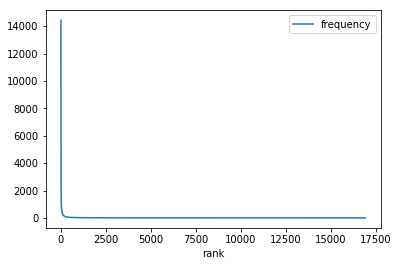

In [71]:
df.plot(x='rank',y='frequency')

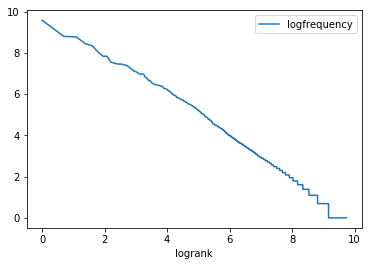

In [72]:
df.plot(x='logrank',y='logfrequency')

At the extreme ends, the most and less frequent words have less than the required frequency to follow zipf's law

In [73]:
import random
def generateRandomText(size):
    text='';
    for i in range(size):
        text+=random.choice('abcdefg ');
    return text

In [74]:
text=generateRandomText(300000).split(' ');
text[:5]

['ggbcbeb', 'fcdddafcadgbbg', 'eaeefe', 'dgf', '']

In [75]:
df=zipfPlot(text)
df.head()

,rank,frequency,logrank,logfrequency
ce,1,95,0.000000,4.553877
aa,2,93,0.693147,4.532599
bf,3,90,1.098612,4.499810
cg,4,90,1.386294,4.499810
ed,5,88,1.609438,4.477337


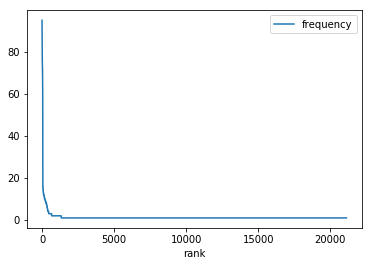

In [76]:
df.plot(x='rank',y='frequency')

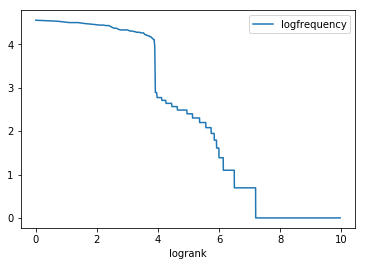

In [77]:
df.plot(x='logrank',y='logfrequency')

The random text doesn't follow Zipf's law at all

#### Exercise 24
Modify the text generation program in 2.2 further, to do the following tasks:<br>
* Store the n most likely words in a list words then randomly choose a word from the list using random.choice(). (You will need to import random first.)<br>
* Select a particular genre, such as a section of the Brown Corpus, or a genesis translation, one of the Gutenberg texts, or one of the Web texts. Train the model on this corpus and get it to generate random text. You may have to experiment with different start words. How intelligible is the text? Discuss the strengths and weaknesses of this method of generating random text.<br>
* Now train your system using two distinct genres and experiment with generating text in the hybrid genre. Discuss your observations.<br>

In [78]:
bigramsBrown = nltk.bigrams(brownWords)
cfdBigramsBrown = nltk.ConditionalFreqDist(bigramsBrown)

In [79]:
def generate_model(cfd,word,n,numWords=15):
    for i in range(numWords):
        print(word,end=' ');
        words=[i for i,j in cfd[word].most_common(n)];
        try:
            word = random.choice(words)
        except:
            print('word doesn\'t exist');
            break;

In [80]:
generate_model(cfdBigramsBrown,'like',10)

like to be taken over coals 15-20 minutes with two or for him at Westminster 

In [81]:
cfdNews = nltk.ConditionalFreqDist(nltk.bigrams(w.lower() for w in brown.words(categories='news') if w.isalpha()))
generate_model(cfdNews,'new',10)

new medical and the last year as they also recommended by an official of its 

In [82]:
generate_model(cfdNews,'major',10)

major factor which is expected back on to be made a new york ap turkish 

The random text generated from this system is only partly intelligible. The main problem with it is that, if in some text there are two words that are rare, there is a chance for them to get selected together making the whole text rare and meaningless

In [83]:
cfdNewsRom = nltk.ConditionalFreqDist(nltk.bigrams(w.lower() for w in brown.words(categories=['news','romance']) if w.isalpha()))
generate_model(cfdNewsRom,'new',10)

new one more foreign countries and he did not the president eisenhower and that he 

This system has a chance to generate some awkward sentences in addition to the meaningless

#### Exercise 25
Define a function find_language() that takes a string as its argument, and returns a list of languages that have that string as a word. Use the udhr corpus and limit your searches to files in the Latin-1 encoding.

In [84]:
from nltk.corpus import udhr
def find_language(string):
    languages=[];
    for fileid in udhr.fileids():
        if 'Latin1' in fileid and string in [w.lower() for w in udhr.words(fileid)]:
            languages.append(fileid[:-7]);
    return languages;

In [85]:
find_language('like')

['NigerianPidginEnglish',
 'Norwegian',
 'Norwegian_Norsk-Bokmal',
 'Norwegian_Norsk-Nynorsk']

#### Exercise 26
What is the branching factor of the noun hypernym hierarchy? I.e. for every noun synset that has hyponyms — or children in the hypernym hierarchy — how many do they have on average? You can get all noun synsets using wn.all_synsets('n').

In [86]:
def branchingFactor(synsets):
    path=0;
    count=0;
    for synset in synsets:
        hyponyms=synset.hyponyms();
        if len(hyponyms)>0:
            count+=1;
            path+=len(hyponyms);
    return round(path/count,2);

In [87]:
branchingFactor(wn.all_synsets('n'))

4.54

#### Exercise 27
The polysemy of a word is the number of senses it has. Using WordNet, we can determine that the noun dog has 7 senses with: len(wn.synsets('dog', 'n')). Compute the average polysemy of nouns, verbs, adjectives and adverbs according to WordNet.

In [88]:
def avg_polysemy(pos):
    path=0;
    seen_words=[];
    synsets=wn.all_synsets(pos);
    for synset in synsets:
        lemma_names=synset.lemma_names();
        for lemma in lemma_names:
            if lemma not in seen_words:
                seen_words.append(lemma);
                path+=len(wn.synsets(lemma,pos))
    return round(path/len(seen_words),2);

In [89]:
avg_polysemy('n')

1.28

In [90]:
avg_polysemy('v')

2.19

In [99]:
avg_polysemy('a')

1.41

In [100]:
avg_polysemy('r')

1.25

#### Exercise 28
Use one of the predefined similarity measures to score the similarity of each of the following pairs of words. Rank the pairs in order of decreasing similarity. How close is your ranking to the order given here, an order that was established experimentally by (Miller & Charles, 1998): car-automobile, gem-jewel, journey-voyage, boy-lad, coast-shore, asylum-madhouse, magician-wizard, midday-noon, furnace-stove, food-fruit, bird-cock, bird-crane, tool-implement, brother-monk, lad-brother, crane-implement, journey-car, monk-oracle, cemetery-woodland, food-rooster, coast-hill, forest-graveyard, shore-woodland, monk-slave, coast-forest, lad-wizard, chord-smile, glass-magician, rooster-voyage, noon-string.

In [91]:
def FindSimilarity(word1,word2):
    syn1=wn.synset(word1);
    syn2=wn.synset(word2);
    return syn1.path_similarity(syn2)

In [92]:
words=['car-automobile', 'gem-jewel', 'journey-voyage', 'boy-lad', 
       'coast-shore', 'asylum-madhouse', 'magician-wizard', 'midday-noon', 
       'furnace-stove', 'food-fruit', 'bird-cock', 'bird-crane', 'tool-implement', 
       'brother-monk', 'lad-brother', 'crane-implement', 'journey-car', 
       'monk-oracle', 'cemetery-woodland', 'food-rooster', 'coast-hill', 
       'forest-graveyard', 'shore-woodland', 'monk-slave', 'coast-forest', 
       'lad-wizard', 'chord-smile', 'glass-magician', 'rooster-voyage', 
       'noon-string']

In [93]:
def SimilarityMeasures():
    s=[]
    for w in words:
        word1,word2=w.split('-');
        word1+='.n.01';
        word2+='.n.01';
        s.append((round(FindSimilarity(word1,word2),2),w));
    return sorted(s,reverse=True)

In [94]:
SimilarityMeasures()

[(1.0, 'midday-noon'),
 (1.0, 'car-automobile'),
 (0.5, 'tool-implement'),
 (0.5, 'coast-shore'),
 (0.33, 'boy-lad'),
 (0.25, 'journey-voyage'),
 (0.2, 'shore-woodland'),
 (0.2, 'monk-slave'),
 (0.2, 'lad-wizard'),
 (0.2, 'coast-hill'),
 (0.17, 'magician-wizard'),
 (0.14, 'lad-brother'),
 (0.12, 'monk-oracle'),
 (0.12, 'gem-jewel'),
 (0.12, 'brother-monk'),
 (0.12, 'asylum-madhouse'),
 (0.11, 'glass-magician'),
 (0.11, 'cemetery-woodland'),
 (0.11, 'bird-crane'),
 (0.1, 'crane-implement'),
 (0.09, 'food-fruit'),
 (0.09, 'coast-forest'),
 (0.09, 'chord-smile'),
 (0.08, 'furnace-stove'),
 (0.07, 'forest-graveyard'),
 (0.06, 'noon-string'),
 (0.06, 'food-rooster'),
 (0.06, 'bird-cock'),
 (0.05, 'journey-car'),
 (0.04, 'rooster-voyage')]

Very much different!